Primero, vamos a traernos partes del archivo anterior, para ir continuando el mismo hilo que veniamos haciendo, pero ahora orientado al desarrollo de modelos.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('datasets/imports-85.data', header=None)

headings = ["symboling","normalized-losses","make","fuel-type","aspiration","num-of-doors","body-style","drive-wheels","engine-location","wheel-base","length","width","height","curb-weight","engine-type","num-of-cylinders","engine-size","fuel-system","bore","stroke","compression-ration","horsepower","peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headings

#forzar interpretacion numerica
df["normalized-losses"] = pd.to_numeric(df["normalized-losses"], errors='coerce')

#reemplazo por la media
df["normalized-losses"].replace(np.nan,df["normalized-losses"].mean(), inplace=True)

df["city-mpg"] = 235/df["city-mpg"]
df.rename(columns={"city-mpg":"city-L/100km"}, inplace=True)

df["horsepower"].replace("?",0, inplace=True)
df["horsepower"] = df["horsepower"].astype("int")

#df[ df.price.apply(lambda x: x.isnumeric()) ].set_index("price")
df["price"].replace("?",0, inplace=True)
df["price"] = df["price"].astype("int")

#Para el largo de los autos, vamos a usar min-max
df["length"] = (df["length"] - df["length"].min())/(df["length"].max() - df["length"].min())

#para el ancho y el alto, vamos a probar con Z-score
df["width"] = (df["width"] - df["width"].mean()) / df["width"].std()
df["height"] = (df["height"] - df["height"].mean()) / df["height"].std()

#recordar: linspace nos genera intervalos de igual tamaño
#armo un vector de 4 numeros, desde el minimo hasta el maximo, asi me quedan 3 segmentos
bins = np.linspace(min(df["price"]), max(df["price"]),4)
#defino los grupos que quiero crear
groups = ["Low","Medium","High"]
#agrego la columna con los grupos, usando la funcion cut
df["price-binned"] = pd.cut(df["price"],bins,labels=groups,include_lowest=True)

drive_wheels_counts = df['drive-wheels'].value_counts()
body_style_counts = df['body-style'].value_counts()
fuel_system_counts = df['fuel-system'].value_counts()

drive_wheels_counts.rename(columns={'drive-wheels':'value_counts'}, inplace=True)
drive_wheels_counts.index.name= 'drive-wheels'


# Simple Linear Regression#

__Sólo se maneja una variable independiente

Variable independiente 'X'

Varaible dependiente 'Y'

En nuestros terminos, 'X' sera la variable que usaremos para hacer la prediccion; mientras que 'Y' sera nuestro target, el objetivo que queremos predecir.

Para determinar la linea tomamos datos de ejemplo, de nuestro dataset, y lo usamos para entrenar el modelo (fit).
Una vez que esta ajustado, obtenemos el punto de corte en el eje 'y' (u ordenada al origen) que seria nuestro _b0_; y, por otro lado, tambien encontramos la pendiente(scople) _b1_.


Por otro lado, introducimos un nuevo concepto, llamado 'noise', o ruido. Este concepto hace referencia a la diferencia que tenemos a la hora de comparar el dato real obtenido del dataset, y el dato predicho, consecuencia del modelo.

Para ajustar un modelo lineal, vamos a hacer:

In [2]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

Ahora vamos a definir X e Y, realizar el ajuste y obtener una prediccion.

In [35]:
X = df[['highway-mpg']] #La caracteristica que voy a usar para la prediccion
Y = df['price'] #La caracteristica que quiero predecir

lm.fit(X,Y) #Realizamos el ajuste

Yhat = lm.predict(X) #Obtenemos la prediccion, nuestro famoso 'Y sombrero' o 'Ŷ'

Podemos ver el b0 y el b1

In [8]:
b0 = lm.intercept_ #La ordenada al origen
b1 = lm.coef_ #La pendiente, o scople
print(b0,b1)

-13429.996110943659 [  8.56938197   4.72136899 105.81707729]


A partir de estos datos, vemos que la ecuacion de Ŷ seria :

Price(lo que queremos predecir) = b0 + b1 * highway-mpg

# Multiple Linear Model#

Ahora, podemos considerar mas de una variable explicativa. El modelo de regresion múltiple estudia la relacion entre una variable de interes _'Y'_ (variable que quiero predecir o dependiente) y un conjunto de variables explicativas o regresoras(variables que utilizo para predecir)

Funciona de manera similar al Simple, con la diferencia que ahora tenemos mas caracteristicas para ajustar el modelo.

In [27]:
Z = df [['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']] #Conjunto de variables explicativas (caracteristicas)

lm.fit(Z,df['price']) #Aca digo que quiero ajustar el precio, teniendo en cuenta lo declarado en Z

Yhat1 = lm.predict(Z)

# Residual Plot

Un Residual Plot, nos sirve para visualizar el ruido (noise), es decir, la diferencia entre el valor predicho y el valor real, en relacion a todo el conjunto de datos trabajado.

Un residual plot que nos indique que la predicción está siendo aunque sea parcialmente buena, es si en el grafico de dispersion, la mayor parte de los puntos tienen tendencia a encontrarse cerca del eje de las abscisas (y=0)

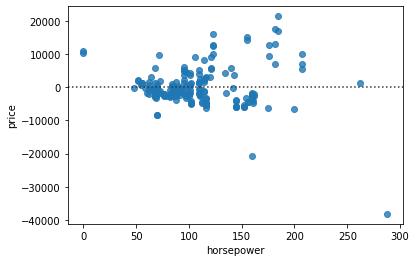

In [20]:
import seaborn as sns
sns.residplot(df['horsepower'],df['price'])

# Distribution Plot

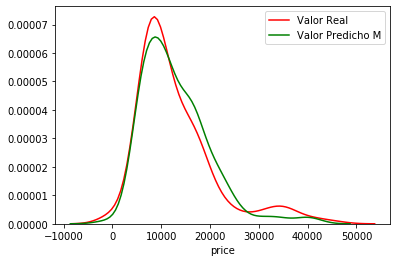

In [69]:
ax1 = sns.distplot(df['price'], hist=False, color='r', label='Valor Real')
#ax2=sns.distplot(Yhat,hist=False, color='b', label='Valor Predicho S', ax=ax1)
sns.distplot(Yhat1,hist=False, color='g', label='Valor Predicho M', ax=ax1)

_Con esto podemos comparar los valores reales y los valores predichos hechos con la regresion lineal múltiple. Vemos que esta regresion se acerca bastante a los valores reales del precio, que se encuentran en el dataset._

# Regresion Polynomial Simple(Una dimension)

El concepto básico es sencillo. Tenemos una sola variable explicativa contínua, x, pero podemos ajustar potencias mayores de x, como x2, x3 … y añadirlas al modelo, junto a x, para describir diversos tipos de curvatura en la relación y x.+

In [45]:


= np.polyfit(X['highway-mpg'],Y,3) # PASO X, Y Y EL GRADO DEL POLOINOMIO.
p = np.poly1d(f)
p

poly1d([-1.49872547e+00,  1.96887677e+02, -8.63947169e+03,  1.33515385e+05])

# Regresion Polinomial Multiple(Varias dimensiones)

En este caso, tenemos varias variables explicativas, que se encuentran elevados a exponentes no lineales. Sin dudas es la estimacion mas precisa hecha hasta el momento .

En este punto, introducimos tambien el concepto de pipeline, lo que seria una 'linea de trabajo' o 'trabajo en serie'. Esto nos permite simplificar mucho el proceso de regresion.

In [60]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pr = PolynomialFeatures(degree=2, include_bias=False)
x_polly=pr.fit_transform(df[['horsepower', 'curb-weight']])

In [56]:
SCALE= StandardScaler()
SCALE.fit(df[['horsepower','highway-mpg']])
x_scale=SCALE.transform(df[['horsepower','highway-mpg']])

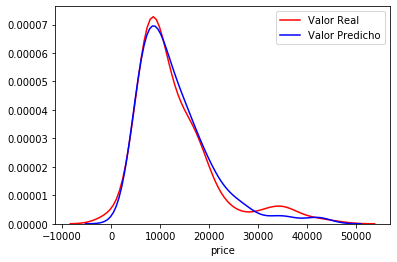

In [67]:
Input=[('scale',StandardScaler()),('polynomial',PolynomialFeatures(degree=2)),('model',LinearRegression())]
pipe=Pipeline(Input)

pipe.fit(df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],Y)
yhat=pipe.predict(df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

ax1 = sns.distplot(df['price'], hist=False, color='r', label='Valor Real')
ax2=sns.distplot(yhat,hist=False, color='b', label='Valor Predicho', ax=ax1)
